## Trump Tweets Effect On Turkish Liras

In this notebook we are going to analyse


#### Import Libraryies and Load Tweets Data


In [87]:
import pandas as pd 
import datetime
import sys
import numpy as np
import os 
import time
import textblob
from textblob import TextBlob
import math
import re
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv("trump-tweets.csv") 
df.head()


,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,RT @realDonaldTrump: Will be doing a major int...,05-05-2020 22:21:41,11399,0,True,1257797644107149312
1,RT @TeamTrump: Owners of Sammy’s Mexican Resta...,05-05-2020 22:07:58,14792,0,True,1257794190487912450
2,I was thrilled to be back in the Great State o...,05-05-2020 22:06:11,11050,46649,False,1257793742540386304
3,Will be doing a major interview tonight at 6:3...,05-05-2020 20:25:31,12980,58657,False,1257768408256409601
4,On #NationalTeacherDay we recognize the countl...,05-05-2020 19:25:14,9578,40426,False,1257753237790158848


#### Cleaning Data

We need clean all urls, special chracters etc.

In [64]:
#clean text
def textclean(Text):
    Text = Text.str.replace('http\S+|www.\S+|—','', case=False)
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0)', ' ') 
    Text = Text.str.replace('[^A-Za-z ]+', ' ')
    Text = Text.str.replace('[^A-Za-z ]+', '')
    #Text = Text.str.replace('—', '')
    return Text

In [66]:
df = df.rename(columns={'created_at': 'Date','text': 'Text'})
df = df.drop(['id_str'], axis=1)

df = df[~df['Text'].str.contains("RT @")]
df['Clean_Text'] = textclean(df['Text'])

df.head()

,Text,Date,retweet_count,favorite_count,is_retweet,Clean_Text
2,I was thrilled to be back in the Great State o...,05-05-2020 22:06:11,11050,46649,False,I was thrilled to be back in the Great State o...
3,Will be doing a major interview tonight at 6:3...,05-05-2020 20:25:31,12980,58657,False,Will be doing a major interview tonight at P...
4,On #NationalTeacherDay we recognize the countl...,05-05-2020 19:25:14,9578,40426,False,On NationalTeacherDay we recognize the countl...
5,Getting ready to land in the Great State of Ar...,05-05-2020 18:51:34,12400,100363,False,Getting ready to land in the Great State of Ar...
6,Wow! Congratulations to Greg Gutfeld a one tim...,05-05-2020 18:50:20,29668,137807,False,Wow Congratulations to Greg Gutfeld a one tim...


In [67]:
sentiment = df.apply(lambda x : analyzer.polarity_scores(x['Text']), axis=1)
df['Compound'] = sentiment.apply(lambda x : x.get('compound') )

df

,Text,Date,retweet_count,favorite_count,is_retweet,Clean_Text,Compound
2,I was thrilled to be back in the Great State o...,05-05-2020 22:06:11,11050,46649,False,I was thrilled to be back in the Great State o...,0.8070
3,Will be doing a major interview tonight at 6:3...,05-05-2020 20:25:31,12980,58657,False,Will be doing a major interview tonight at P...,0.0000
4,On #NationalTeacherDay we recognize the countl...,05-05-2020 19:25:14,9578,40426,False,On NationalTeacherDay we recognize the countl...,0.6588
5,Getting ready to land in the Great State of Ar...,05-05-2020 18:51:34,12400,100363,False,Getting ready to land in the Great State of Ar...,0.7840
6,Wow! Congratulations to Greg Gutfeld a one tim...,05-05-2020 18:50:20,29668,137807,False,Wow Congratulations to Greg Gutfeld a one tim...,0.9211
...,...,...,...,...,...,...,...
17587,power from Washington D.C. and giving it back ...,01-20-2017 17:51:58,18362,91143,False,power from Washington D C and giving it back ...,0.3400
17588,Today we are not merely transferring power fro...,01-20-2017 17:51:25,20125,109640,False,Today we are not merely transferring power fro...,0.2144
17589,It all begins today! I will see you at 11:00 A...,01-20-2017 12:31:53,70523,268372,False,It all begins today I will see you at A M ...,0.0000
17590,Thank you for a wonderful evening in Washingto...,01-20-2017 04:24:33,20770,112829,False,Thank you for a wonderful evening in Washingto...,0.7351


In [68]:
dolar_tl = pd.read_csv("USDTRY=X.csv", index_col = 0)
dolar_tl = dolar_tl[~dolar_tl['Close'].astype(str).str.contains('null')]
dolar_tl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,3.82683,3.83307,3.78906,3.82700,3.82700,0.0
2017-01-23,3.76441,3.78569,3.75150,3.76543,3.76543,0.0
2017-01-24,3.75470,3.82486,3.73550,3.75450,3.75450,0.0
2017-01-25,3.78280,3.85546,3.78000,3.78191,3.78191,0.0
2017-01-26,3.83055,3.87047,3.80850,3.83340,3.83340,0.0


In [69]:
dolar_tl_close = dolar_tl['Close']

dolar_tl_close

Date
2017-01-20    3.82700
2017-01-23    3.76543
2017-01-24    3.75450
2017-01-25    3.78191
2017-01-26    3.83340
               ...   
2020-05-04    7.01680
2020-05-05    7.04466
2020-05-06    7.08370
2020-05-07    7.19708
2020-05-08    7.08830
Name: Close, Length: 861, dtype: float64

In [70]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9)})
plt.rcParams["date.autoformatter.minute"] = "%Y-%m"
sns.set_style("whitegrid")



In [72]:
searchfor = ['turkey' , 'brunson' , 'erdogan']

df2 = df[df['Clean_Text'].str.contains('|'.join(searchfor), na=False, case=False)]

#df2['Formatted_Fate'] = pd.to_datetime(df2["Date"].dt.strftime('%Y-%m-%d'))

count_row = df2.shape[0]

count_row

60

In [73]:
# df2['Formatted_Date'] = pd.to_datetime(df2['Date'] ,errors = 'coerce',format = '%Y-%m-%d')

# df2.dtypes

df2['Formatted_Date']  =  pd.to_datetime(df2['Date'], infer_datetime_format=True)

#df2['Formatted_Date']  = pd.to_datetime(df2['Formatted_Date'], format='%m/%d/%Y')

df2

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Text,Date,retweet_count,favorite_count,is_retweet,Clean_Text,Compound,Formatted_Date
3958,Russia Syria and Iran are killing or on their ...,12-26-2019 15:25:12,23085,107098,False,Russia Syria and Iran are killing or on their ...,-0.8832,2019-12-26 15:25:12
3960,Russia Syria and Iran are killing or on their ...,12-26-2019 14:12:33,7257,28362,False,Russia Syria and Iran are killing or on their ...,-0.9134,2019-12-26 14:12:33
4871,....Just finished meetings with Turkey and Ger...,12-04-2019 14:26:36,9290,44078,False,Just finished meetings with Turkey and German...,0.0000,2019-12-04 14:26:36
5620,....Also talked about their Border with Syria ...,11-06-2019 20:15:58,10092,45174,False,Also talked about their Border with Syria the...,-0.8398,2019-11-06 20:15:58
5621,Just had a very good call with President @RTEr...,11-06-2019 20:15:58,16347,68452,False,Just had a very good call with President RTEr...,-0.8522,2019-11-06 20:15:58
6021,Turkey fully understands not to fire on the Ku...,10-25-2019 12:32:06,14964,64755,False,Turkey fully understands not to fire on the Ku...,0.7669,2019-10-25 12:32:06
6034,The Oil Fields discussed in my speech on Turke...,10-24-2019 15:25:23,17920,73405,False,The Oil Fields discussed in my speech on Turke...,0.6996,2019-10-24 15:25:23
6064,Big success on the Turkey/Syria Border. Safe Z...,10-23-2019 12:39:20,21683,80796,False,Big success on the Turkey Syria Border Safe Z...,0.9297,2019-10-23 12:39:20
6093,Good news seems to be happening with respect t...,10-22-2019 22:18:29,21495,100886,False,Good news seems to be happening with respect t...,0.7424,2019-10-22 22:18:29
6231,Think of how many lives we saved in Syria and ...,10-18-2019 23:25:50,19690,96323,False,Think of how many lives we saved in Syria and ...,0.4753,2019-10-18 23:25:50


In [74]:
df2['strDate'] = df2['Formatted_Date'].dt.strftime('%Y-%m-%d')

df2.to_csv('turkey-tweet.csv')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
for index, row in df2.iterrows():
    print(row['Compound'], row['strDate'])

-0.8832 2019-12-26
-0.9134 2019-12-26
0.0 2019-12-04
-0.8398 2019-11-06
-0.8522 2019-11-06
0.7669 2019-10-25
0.6996 2019-10-24
0.9297 2019-10-23
0.7424 2019-10-22
0.4753 2019-10-18
0.9198 2019-10-18
-0.5106 2019-10-18
0.8655 2019-10-17
0.0 2019-10-14
-0.6249 2019-10-14
-0.0258 2019-10-14
-0.3287 2019-10-14
-0.7514 2019-10-13
0.8777 2019-10-13
-0.953 2019-10-13
-0.8834 2019-10-13
0.5266 2019-10-10
-0.8398 2019-10-10
-0.7171 2019-10-10
-0.9317 2019-10-10
-0.7901 2019-10-10
-0.9041 2019-10-09
-0.7088 2019-10-08
0.7776 2019-10-08
0.6808 2019-10-08
0.8689 2019-10-08
0.1619 2019-10-07
-0.6956 2019-10-07
-0.836 2019-10-07
0.9039 2019-01-14
-0.8957 2019-01-13
-0.5574 2019-01-13
0.3989 2018-12-24
0.0 2018-12-23
0.4199 2018-12-22
0.0 2018-10-18
0.6249 2018-10-18
-0.4753 2018-10-15
0.7808 2018-10-14
0.6155 2018-10-13
0.9542 2018-10-13
0.9359 2018-10-13
0.0 2018-10-12
0.75 2018-10-12
-0.2465 2018-10-12
0.7463 2018-08-16
0.7069 2018-08-10
0.9016 2018-07-26
0.2901 2018-07-19
0.8818 2018-04-18
0.4003

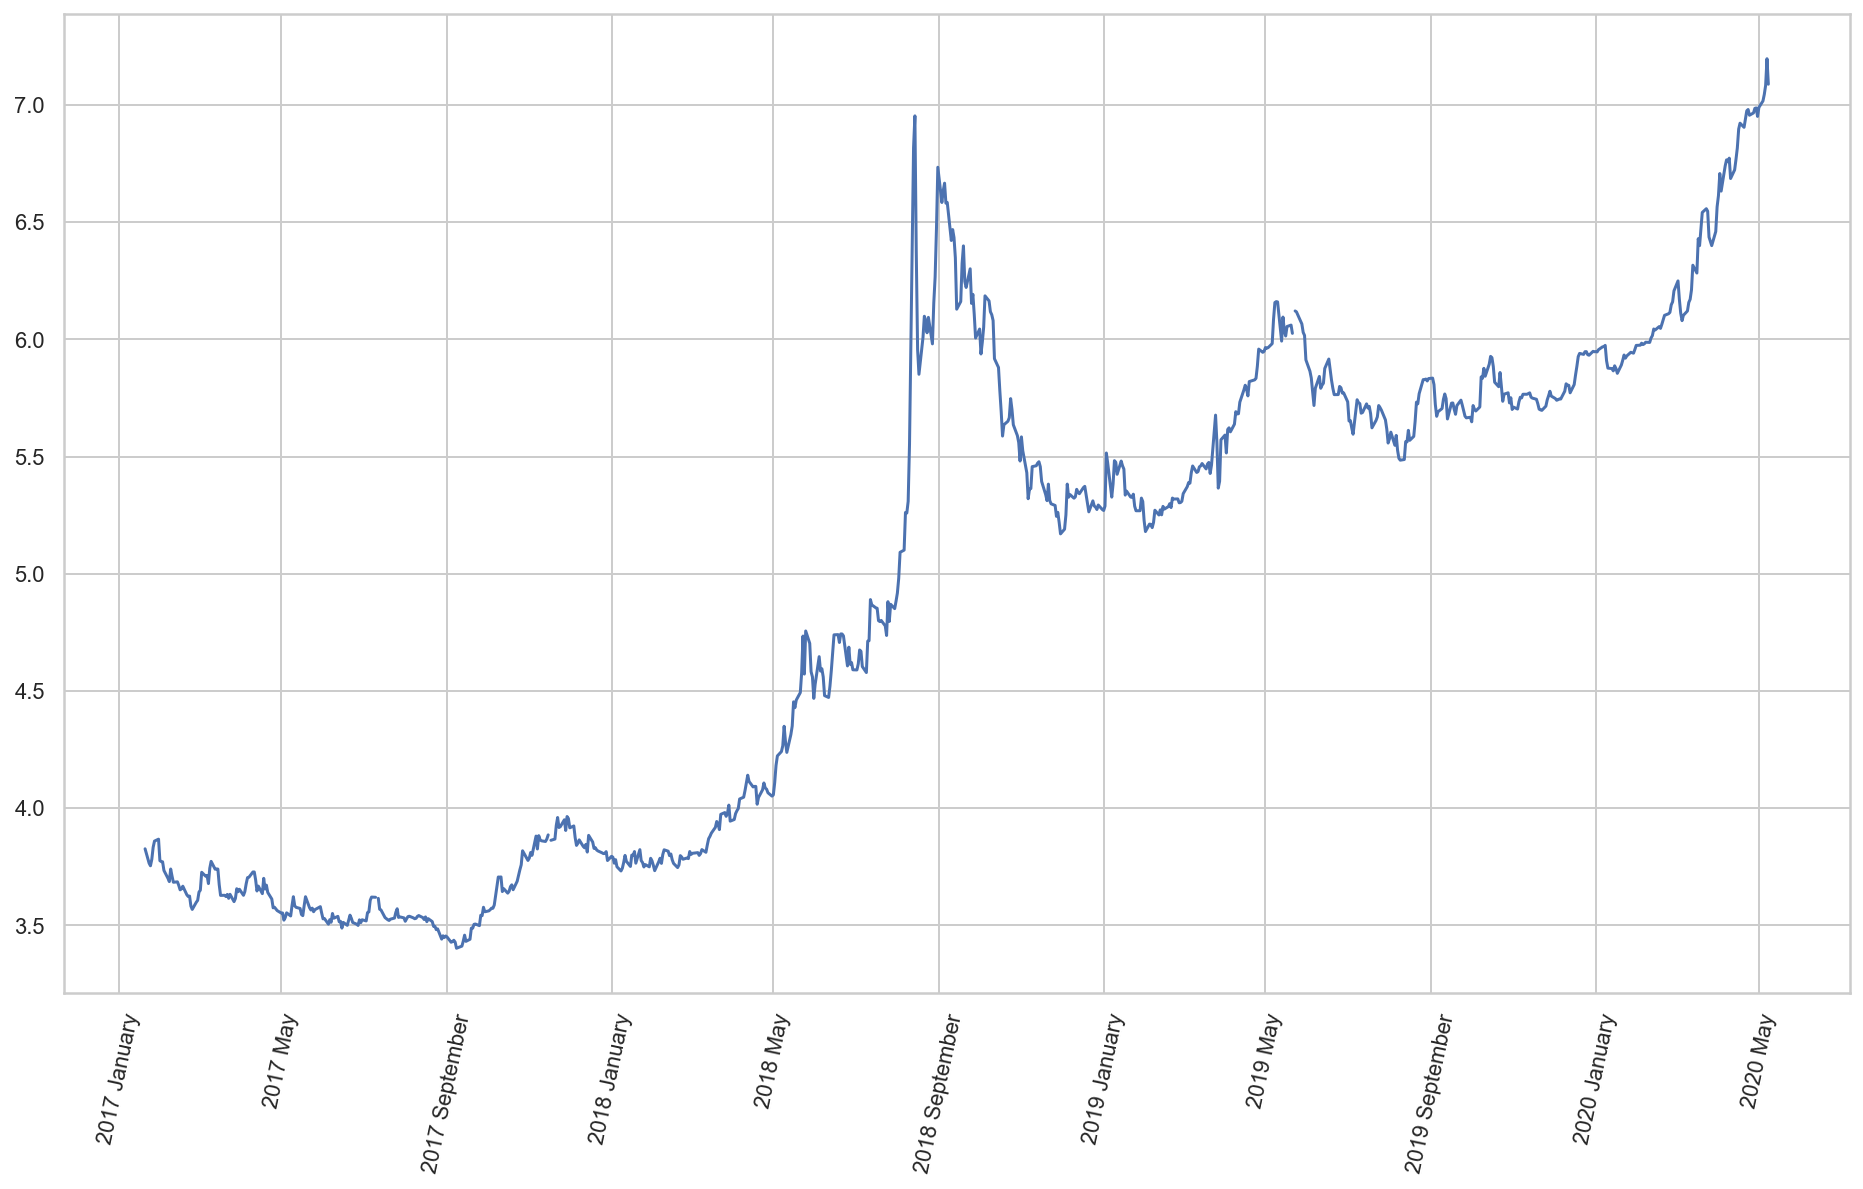

In [76]:
fig,ax1 = plt.subplots()

dolar_tl_close.index = pd.DatetimeIndex(dolar_tl_close.index)

plt.plot(dolar_tl_close.index, dolar_tl_close.values)

monthyearFmt = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=78)



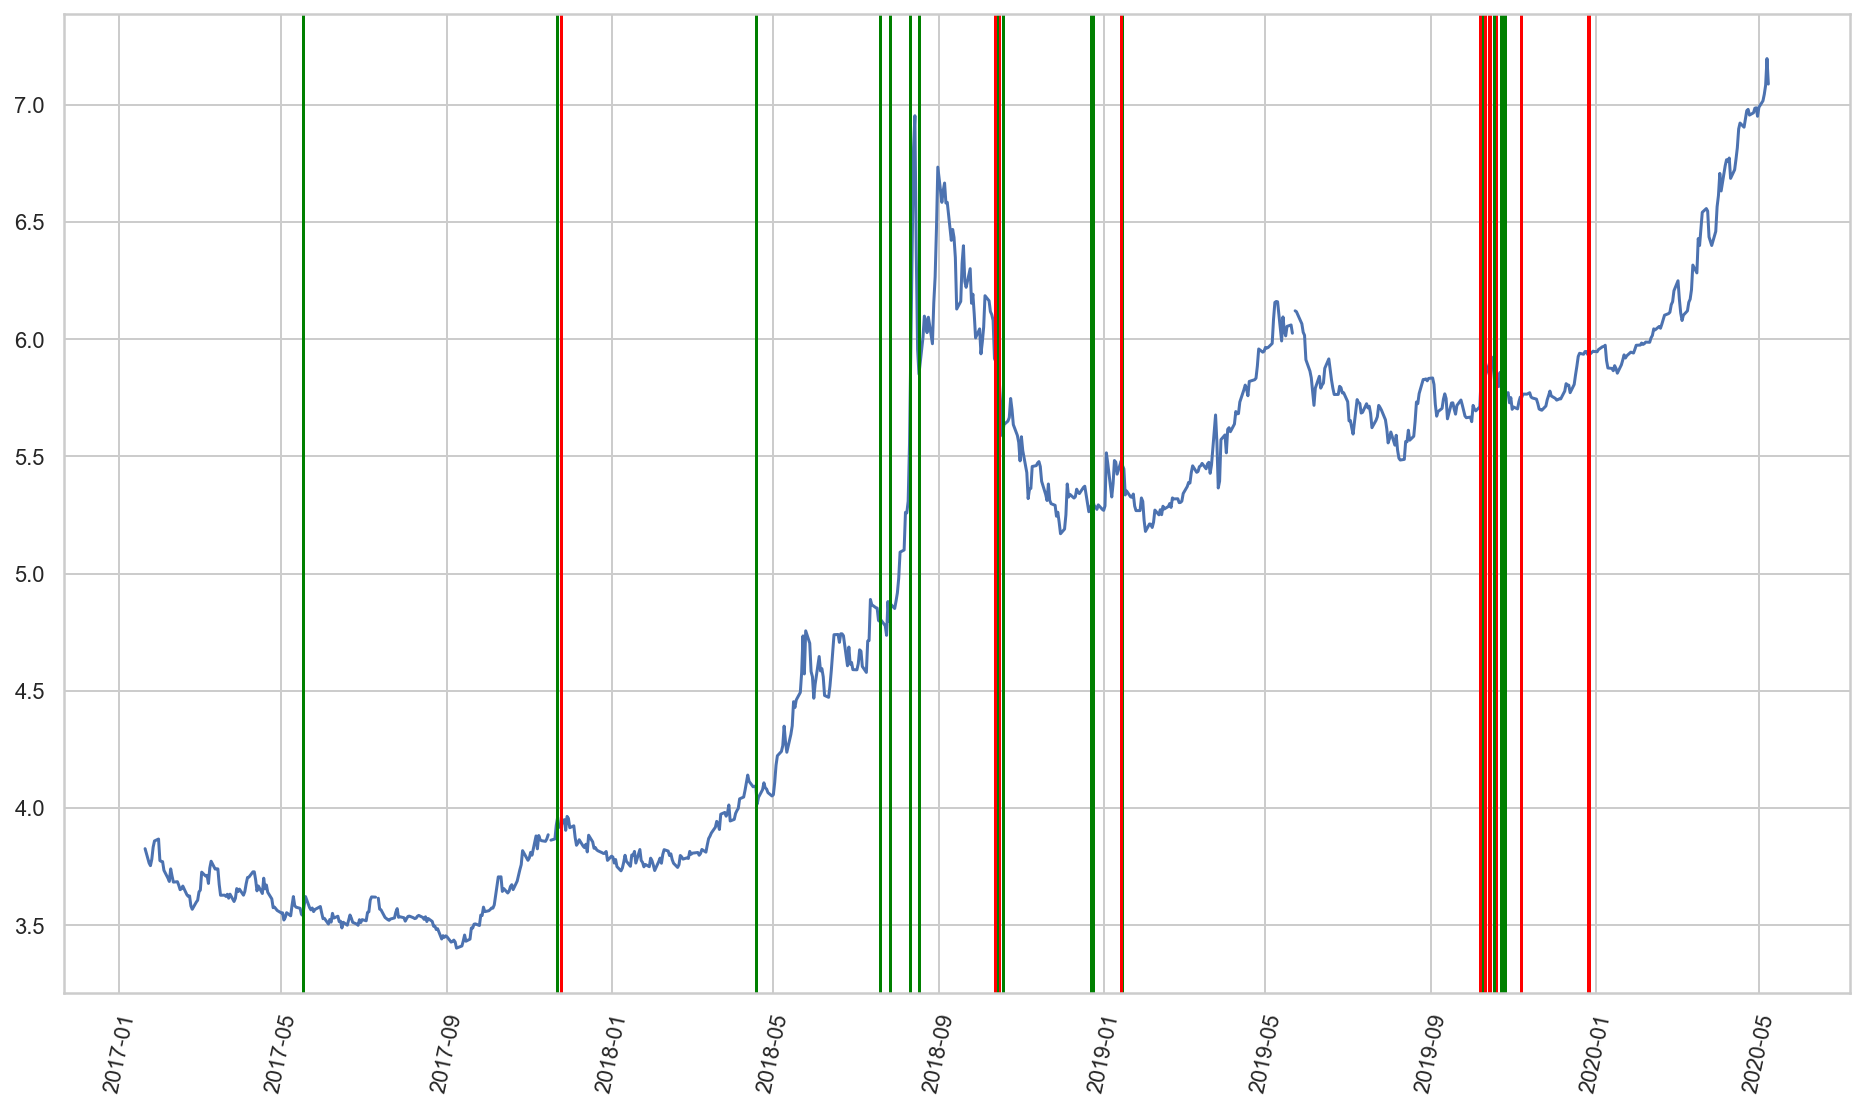

In [90]:
plt.plot(dolar_tl_close.index, dolar_tl_close.values)

monthyearFmt = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=78)

# Compound, formatted_date, Clean_Text
for index, row in df2.iterrows():
    if row['Compound'] > 0:
        plt.axvline(x=row['Formatted_Date'], color='green')
    elif row['Compound'] < 0:
        plt.axvline(x=row['Formatted_Date'], color='red')

#ax1.set_xlim([datetime.date(2018, 7, 26), datetime.date(2019, 2, 1)])